In [1]:
# Cell 1 : Importing the required libraries
import random
import matplotlib.pyplot as plt

In [2]:
# Cell 2 : Defining the Fitness Function
def fitness_function(chromosome):
    a, b, c, d = chromosome
    return abs((a + 2 * b + 3 * c + 4 * d) - 30)

In [3]:
# Cell 3 : Defining the Initialize Function
def initialize_population(pop_size, gene_genre):
    return [[random.randint(0, gene_genre) for _ in range(4)] for _ in range(pop_size)]

In [4]:
# Cell 4 : Defining the Evaluate Function
def evaluate_population(population):
    return [fitness_function(chromosome) for chromosome in population]

In [5]:
# Cell 5 : Defining the Select Parents Function
def select_parents(population, fitness):
    total_fitness = sum(1 / (1 + f) for f in fitness)
    probabilities = [(1 / (1 + f)) / total_fitness for f in fitness]
    cumulative_probabilities = [sum(probabilities[:i+1]) for i in range(len(probabilities))]

    def roulette_wheel_select():
        r = random.random()
        for i, p in enumerate(cumulative_probabilities):
            if r <= p:
                return population[i]
    
    return [roulette_wheel_select() for _ in range(len(population))]

In [ ]:
# Cell 6 : Define the Crossover Function
def crossover(parents, crossover_rate):
    offspring = []
    for i in range(0, len(parents), 2):
        if i + 1 >= len(parents):
            offspring.append(parents[i])
            continue
        parent1, parent2 = parents[i], parents[i + 1]
        if random.random() < crossover_rate:
            point = random.randint(1, len(parent1) - 1)
            child1 = parent1[:point] + parent2[point:]
            child2 = parent2[:point] + parent1[point:]
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring

In [7]:
# Cell 7 : Defining the Mutation Function
def mutate(population, mutation_rate, gene_range):
    for chromosome in population:
        if random.random() < mutation_rate:
            gene_index = random.randint(0, len(chromosome) - 1)
            chromosome[gene_index] = random.randint(0, gene_range)
    return population

In [8]:
# Cell 8 : Define the Genetic Algorithm Function
def genetic_algorithm(pop_size, gene_range, generations, crossover_rate, mutation_rate):
    population = initialize_population(pop_size, gene_range)
    best_fitness_over_time = []
    for generation in range(generations):
        fitness = evaluate_population(population)
        best_fitness_over_time.append(min(fitness))
        if 0 in fitness:
            best_solution = population[fitness.index(0)]
            print(f"Solution found in generation {generation}: {best_solution}")
            return best_solution, best_fitness_over_time
        
        parents = select_parents(population, fitness)
        offspring = crossover(parents, crossover_rate)
        population = mutate(offspring, mutation_rate, gene_range)
    
    fitness = evaluate_population(population)
    best_solution = population[fitness.index(min(fitness))]
    print (f"Best solution after  {generations} generations: {best_solution}")
    return best_solution, best_fitness_over_time

In [9]:
# Cell 9 : Initialize the Parameters
pop_size = 6
gene_range = 30
generations = 50
crossover_rate = 0.25
mutate_rate = 0.1

In [10]:
# Cell 10 : Run the Genetic Algorithm
solution, fitness_over_time = genetic_algorithm(pop_size, gene_range, generations, crossover_rate, mutate_rate)

Best solution after  50 generations: [25, 4, 6, 5]


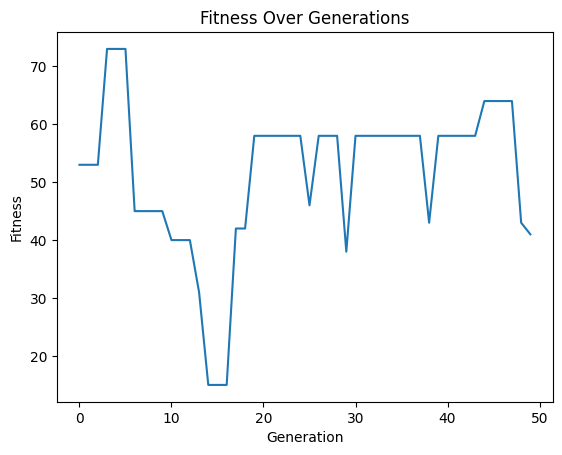

In [11]:
# Cell 11: Visualize the Results
plt.plot(range(len(fitness_over_time)), fitness_over_time)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()